In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import config
from preprocessing import mappings, transforms, treebank_reader
from training import pcfg, lpcfg

if __name__ == '__main__':
    config.train = treebank_reader.read(config.train_file, cutoff=True)

    config.nonterminal_map = mappings.NonterminalMap(config.train)
    config.terminal_map = mappings.TerminalMap(config.train, len(config.nonterminal_map))
    transforms.transform_trees(config.train)

Transform from strs to ints: 100%|██████████| 39092/39092 [00:05<00:00, 6863.56it/s]


In [4]:
    config.pcfg = pcfg.PCFG()


In [7]:
config.nonterminal_map['.']

28

In [16]:
from collections import Counter

In [18]:
c = Counter()
for r in config.pcfg.rule1s:
    c[config.terminal_map[r.x]] += 1

In [20]:
c.most_common()

[('over', 15),
 ('down', 15),
 ('out', 14),
 ('open', 14),
 ('in', 13),
 ('back', 13),
 ('that', 12),
 ('less', 12),
 ('off', 12),
 ('on', 11),
 ('past', 11),
 ('left', 11),
 ('hurt', 11),
 ('better', 11),
 ('close', 11),
 ('more', 10),
 ('short', 10),
 ('up', 10),
 ('work', 10),
 ('through', 10),
 ('first', 10),
 ('read', 10),
 ('last', 9),
 ('many', 9),
 ('later', 9),
 ('next', 9),
 ('buying', 9),
 ('around', 9),
 ('right', 9),
 ('half', 9),
 ('like', 9),
 ('second', 9),
 ('high', 9),
 ('free', 9),
 ('enough', 9),
 ('lower', 9),
 ('use', 9),
 ('control', 9),
 ('bid', 9),
 ('trade', 9),
 ('outside', 9),
 ('about', 8),
 ('stock', 8),
 ('selling', 8),
 ('cut', 8),
 ('change', 8),
 ('much', 8),
 ('won', 8),
 ('all', 8),
 ('neither', 8),
 ('i', 8),
 ('run', 8),
 ('average', 8),
 ('higher', 8),
 ('long', 8),
 ('good', 8),
 ('hit', 8),
 ('face', 8),
 ('closed', 8),
 ('further', 8),
 ('due', 8),
 ('above', 8),
 ('cost', 8),
 ('easier', 8),
 ('police', 8),
 ('pending', 8),
 ('spread', 8),
 ('

In [10]:
len(config.pcfg.rule1s)

25145

In [12]:
config.pcfg.rule1s

Counter({IN->in: 0.17063732769980547,
         DT->an: 0.04151933239896619,
         NNP->oct.: 0.0039991743640022705,
         CD->19: 0.0029396292972738805,
         NN->review: 0.0001881805506847206,
         IN->of: 0.23518584366960196,
         ``->``: 0.982565741682406,
         DT->the: 0.6033740083064382,
         NN->NN: 0.05677920433841706,
         ''->'': 0.9809353589514448,
         IN->at: 0.0480662636742036,
         NNP->chicago: 0.0015996697456009082,
         POS->'s: 0.9297057449789817,
         NNP->goodman: 9.030393725166417e-05,
         NNP->theatre: 6.450281232261727e-05,
         -LRB-->-lrb-: 0.8399390243902439,
         VBN->VBN: 0.0734822483542452,
         NNS->NNS: 0.07321891049558843,
         VBP->take: 0.003111495246326707,
         NN->stage: 0.00023094885765852073,
         NNP->NNP: 0.12478714071933536,
         NNP->city: 0.0016641725579235255,
         ,->,: 0.9999159222280609,
         NN->leisure: 4.2768306973800133e-05,
         CC->&: 0.0436234

In [11]:
len(config.terminal_map)

10980

In [1]:
import numpy as np
from scipy.linalg import svd

In [12]:
x = np.random.randint(2, size=(10,5))

In [13]:
x

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [1, 1, 0, 0, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0]])

In [45]:
u, s, vt = svd(10*x,full_matrices=False)

In [46]:
s

array([33.92141929, 19.87965852, 15.31470894, 11.31895544,  9.56438333])

In [25]:
np.argmax(u, axis=1)

array([1, 3, 1, 4, 2, 2, 2, 3, 4, 1])

In [50]:
u @ np.diag(s) @ vt

array([[ 3.90170098e-15,  1.00000000e+01, -6.34415122e-15,
         1.67451068e-15,  5.65865035e-15],
       [ 6.15719991e-16,  1.86404619e-15,  1.00000000e+01,
         5.65286840e-15,  1.00000000e+01],
       [ 1.00000000e+01,  1.00000000e+01, -4.21977916e-15,
        -2.66463769e-15,  1.00000000e+01],
       [ 1.00000000e+01,  1.00000000e+01,  1.00000000e+01,
         1.00000000e+01,  1.00000000e+01],
       [ 1.01951390e-15, -7.69071700e-16,  1.00000000e+01,
        -3.14497567e-16,  1.84028520e-15],
       [ 1.00000000e+01,  1.35284405e-15,  1.00000000e+01,
        -1.06571130e-14, -3.34548536e-15],
       [ 2.56383670e-15,  7.20050921e-16,  1.00000000e+01,
         1.00000000e+01,  2.74190042e-15],
       [ 1.28185381e-15,  1.64200158e-15,  1.00000000e+01,
         4.76468998e-15,  1.00000000e+01],
       [-4.20358944e-16,  1.24175124e-15,  1.70282842e-15,
         5.19324457e-15,  1.00000000e+01],
       [ 4.20163783e-15,  1.00000000e+01, -5.84131324e-15,
         3.23489235e-15

In [33]:
u

array([[-0.10667347,  0.35654816,  0.1918456 ,  0.32290518, -0.40052677],
       [-0.33657533, -0.26865521, -0.38196707,  0.13083938, -0.22698819],
       [-0.3805336 ,  0.53685012, -0.17593614, -0.30607462,  0.04848642],
       [-0.63357131,  0.15913482,  0.2422002 ,  0.07396634,  0.38617553],
       [-0.17598568, -0.32240659,  0.13659133,  0.02567652, -0.45361499],
       [-0.28925615, -0.19585601,  0.287368  , -0.70846614, -0.2312286 ],
       [-0.25303771, -0.3777153 ,  0.41813635,  0.38004096,  0.33768911],
       [-0.33657533, -0.26865521, -0.38196707,  0.13083938, -0.22698819],
       [-0.16058965,  0.05375138, -0.5185584 ,  0.10516286,  0.2266268 ],
       [-0.10667347,  0.35654816,  0.1918456 ,  0.32290518, -0.40052677]])

In [35]:
vt

array([[-0.38422952, -0.36185156, -0.59696839, -0.26137144, -0.5447429 ],
       [ 0.25157823,  0.70880556, -0.64093329, -0.10995183,  0.10685591],
       [ 0.23091008,  0.29380595,  0.20918565,  0.431178  , -0.7941571 ],
       [-0.8309728 ,  0.36549494,  0.02906314,  0.40110353,  0.11903337],
       [ 0.21269887, -0.38307916, -0.43385476,  0.75683357,  0.21675456]])

In [30]:
u[3]

array([-0.63357131,  0.15913482,  0.2422002 ,  0.07396634,  0.38617553])

In [37]:
np.sum(u[0] * u[0])

0.4400000000000002

In [39]:
from scipy.spatial.distance import cosine

In [44]:
cosine(u[2],u[0])

0.8388354071949244

In [49]:
sum(abs(u[2]-u[1]))

1.7678831300913194

In [4]:
from preprocessing import treebank_reader

x1 = treebank_reader.read('./files/small-dev.txt')

Reading files: 100%|██████████| 10/10 [00:00<00:00, 547.65it/s]


In [19]:
x2 = treebank_reader.read('./output/baseline_parse.txt')

Reading files: 100%|██████████| 10/10 [00:00<00:00, 1038.66it/s]


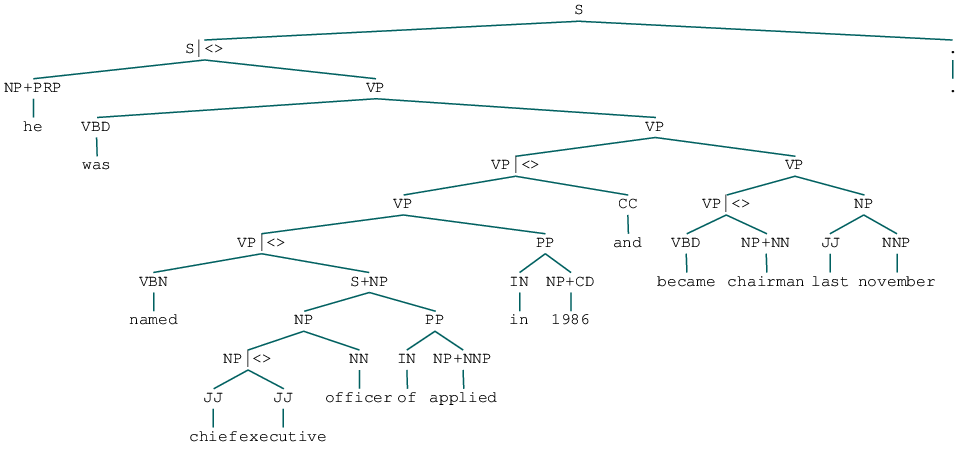

In [39]:
x1[5]

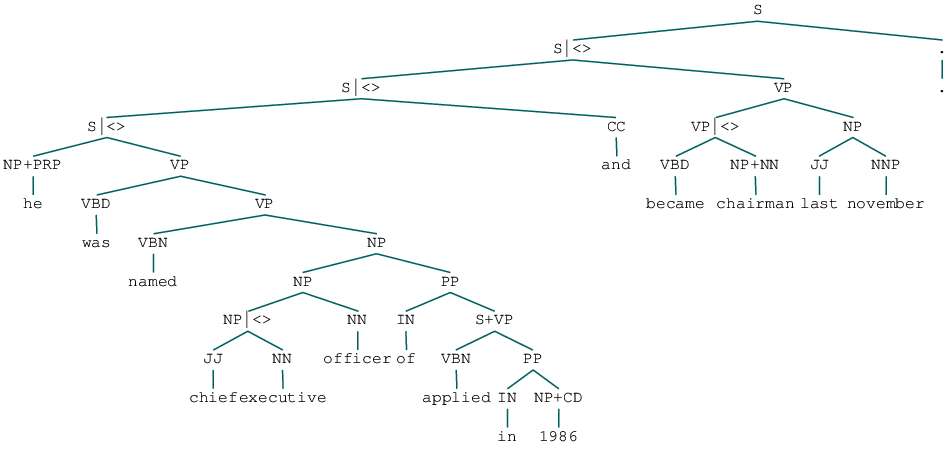

In [38]:
x2[5]

In [12]:
from nltk.tree import Tree

In [34]:
yy = [Tree.convert(x) for x in x1]

In [35]:
for y in yy:
    y.un_chomsky_normal_form()

In [36]:
with open('output/dev_parse.txt', 'w') as f:
    for y in yy:
        f.write(y.pformat(margin=float('inf'))+'\n')

In [26]:
type(Tree.convert(x2[0]))

nltk.tree.Tree

In [24]:
x2

[ParentedNormalTree('S', [ParentedNormalTree('S|<>', [ParentedNormalTree('S|<>', [ParentedNormalTree('S|<>', [ParentedNormalTree('S|<>', [ParentedNormalTree('S|<>', [ParentedNormalTree('NP', [ParentedNormalTree('NNP', ['mr.']), ParentedNormalTree('NNP', ['sim'])]), ParentedNormalTree('VP', [ParentedNormalTree('VBZ', ['considers']), ParentedNormalTree('NP', [ParentedNormalTree('NP', [ParentedNormalTree('NP|<>', [ParentedNormalTree('NP|<>', [ParentedNormalTree('DT', ['the']), ParentedNormalTree('JJ', ['new'])]), ParentedNormalTree('NN', ['unit'])]), ParentedNormalTree('POS', ["'s"])]), ParentedNormalTree('NNS', ['operations'])])])]), ParentedNormalTree('ADJP', [ParentedNormalTree('ADJP|<>', [ParentedNormalTree('``', ['``']), ParentedNormalTree('RB', ['fundamentally'])]), ParentedNormalTree('JJ', ['sound'])])]), ParentedNormalTree("''", ["''"])]), ParentedNormalTree('CC', ['and'])]), ParentedNormalTree('VP', [ParentedNormalTree('VBZ', ['adds']), ParentedNormalTree('SBAR', [ParentedNormalT